## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

## Explore Dataset

In [2]:
data = pd.read_csv('C:/Users/btamm/imdb_sup.csv')

In [3]:
print(data.head())

                                              Review  Rating  Sentiment
0  Kurt Russell's chameleon-like performance, cou...      10          1
1  It was extremely low budget(it some scenes it ...       8          1
2  James Cagney is best known for his tough chara...       8          1
3  Following the brilliant "Goyôkiba" (aka. "Hanz...       8          1
4  One of the last classics of the French New Wav...      10          1


In [4]:
print(data.shape)

(50000, 3)


In [5]:
print(data.columns)

Index(['Review', 'Rating', 'Sentiment'], dtype='object')


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     50000 non-null  object
 1   Rating     50000 non-null  int64 
 2   Sentiment  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB
None


In [7]:
print(data.describe())

             Rating     Sentiment
count  50000.000000  50000.000000
mean       5.495340      0.500000
std        3.478721      0.500005
min        1.000000      0.000000
25%        2.000000      0.000000
50%        5.500000      0.500000
75%        9.000000      1.000000
max       10.000000      1.000000


In [8]:
print(data.isnull().sum())

Review       0
Rating       0
Sentiment    0
dtype: int64


## Data Visualization

In [9]:
data.isnull().any()

Review       False
Rating       False
Sentiment    False
dtype: bool

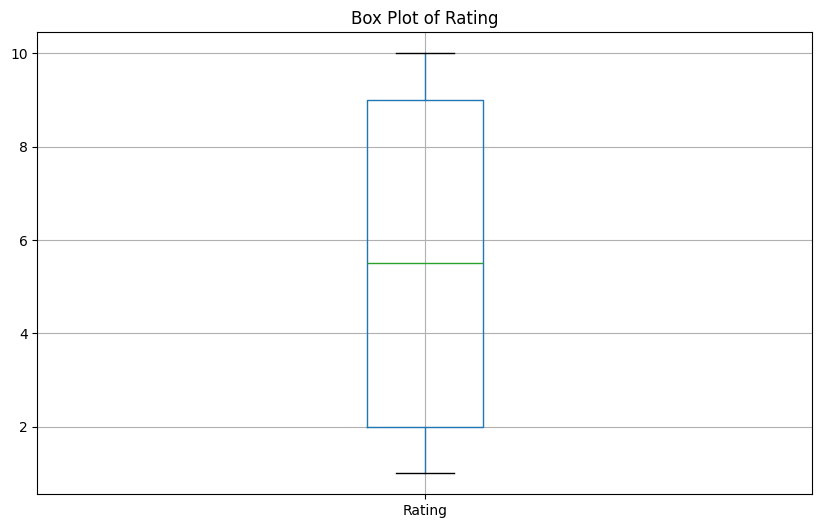

In [10]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Rating')
plt.title('Box Plot of Rating')
plt.show()

## Text Preprocessing

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
x_tfidf = tfidf_vectorizer.fit_transform(data['Review'])

In [12]:
x = x_tfidf.toarray()
x = np.hstack((x, data[['Sentiment']]))
y = data['Rating']

## Scaling

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Dataset Splitting

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)

## Model Training

#### Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Linear Regression R2 score: ", r2_score(y_test, y_pred_lr))
print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2 score:  0.8977756012121262
MSE:  1.2291087149834354
RMSE:  1.1086517555046018


## Model Saving

In [16]:
with open('movie_rating_model.pkl', 'wb') as file:
    pickle.dump(lr, file)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

## Prediction

In [17]:
# with open('movie_rating_model.pkl', 'rb') as file:
#     movie_rating_model = pickle.load(file)

# with open('tfidf_vectorizer.pkl', 'rb') as file:
#     tfidf_vectorizer = pickle.load(file)

# with open('scaler.pkl', 'rb') as file:
#     scaler = pickle.load(file)

# review = input("Please enter the movie review: ")
# sentiment = int(input("Please enter the sentiment (0 for negative, 1 for positive): "))

# review_vector = tfidf_vectorizer.transform([review])

# review_vector_dense = review_vector.toarray()
# review_vector_with_sentiment = np.hstack((review_vector_dense, np.array([[sentiment]])))

# review_vector_scaled = scaler.transform(review_vector_with_sentiment)

# predicted_rating = movie_rating_model.predict(review_vector_scaled)

# feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
# sorted_indices = np.argsort(-review_vector.toarray()).flatten()
# top_keywords = feature_names[sorted_indices[:5]]

# print("\nPredicted Movie Rating:", predicted_rating[0])
# print("Keywords justifying the rating:", ', '.join(top_keywords))


In [18]:
with open('movie_rating_model.pkl', 'rb') as file:
    movie_rating_model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

review = input("Please enter the movie review: ")
sentiment = int(input("Please enter the sentiment (0 for negative, 1 for positive): ")) 

review_vector = tfidf_vectorizer.transform([review])

review_vector_dense = review_vector.toarray()
review_vector_with_sentiment = np.hstack((review_vector_dense, np.array([[sentiment]])))

review_vector_scaled = scaler.transform(review_vector_with_sentiment)

predicted_rating = movie_rating_model.predict(review_vector_scaled)

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
sorted_indices = np.argsort(-review_vector.toarray()).flatten()
top_keywords = feature_names[sorted_indices[:5]]

print("Predicted Movie Rating:", predicted_rating[0])
print("Keywords justifying the rating:", top_keywords)


Predicted Movie Rating: 2.5638641485663514
Keywords justifying the rating: ['movie' 'wrote' 'wrong' 'written' 'writing']
